## Data Science Project: Marketing Experiment

This project is to analyze our e-commerce website UI experiment.

### 1. Read in data

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import graphviz

In [2]:
# read in data from csv
experiment = pd.read_csv('BAexperiment.csv') # experiment data
users = pd.read_csv('BAusers.csv') # customer data

In [3]:
# lets check what the data looks like 
experiment.head()
# conversion 1 means made a purchase afterwards
# condition 1 means subject in the test group, 0 in control group

,user_id,date,interface,language,channel,ads,device,conversion,condition
0,435134,11/30/19,app,English,SEO,NaN,iPhone,0,0
1,310928,12/4/19,browser,English,Ads,Baidu,Sumsung,0,0
2,836325,11/30/19,app,English,Ads,Google,iPhone,0,0
3,298244,12/4/19,browser,English,Referral,NaN,Sumsung,0,0
4,614947,12/4/19,app,English,Ads,Baidu,iPhone,0,1


In [4]:
users.tail()

,user_id,sex,age,state
452780,106844,Female,21,New York
452781,907214,Male,22,Florida
452782,234616,Female,20,Airzona
452783,168038,Female,22,Florida
452784,954132,Male,18,California


In [5]:
# check duplicate records in both tables
print(experiment['user_id'].nunique()) #returens unique values of user_id, same as given in shape, no duplicate
print(users['user_id'].nunique()) # same here
print(experiment.shape)
print(users.shape)

453269
452785
(453269, 9)
(452785, 4)


#### insignigicant difference in the total number of user_id b/w the two tables, about 500 less in the users table. In this experiment, its roughly 0.1% of the total users, use INNER JOIN.

In [6]:
#join
df = experiment.merge(users, on = ['user_id']) 
# df = pd.merge(experiment, users, on = ['user_id'])
df.head()

,user_id,date,interface,language,channel,ads,device,conversion,condition,sex,age,state
0,435134,11/30/19,app,English,SEO,NaN,iPhone,0,0,Female,18,Texas
1,310928,12/4/19,browser,English,Ads,Baidu,Sumsung,0,0,Male,28,Massachusetts
2,836325,11/30/19,app,English,Ads,Google,iPhone,0,0,Female,24,California
3,298244,12/4/19,browser,English,Referral,NaN,Sumsung,0,0,Male,34,Michigan
4,614947,12/4/19,app,English,Ads,Baidu,iPhone,0,1,Female,18,California


In [7]:
df.describe()

,user_id,conversion,condition,age
count,452733.000000,452733.000000,452733.000000,452733.000000
mean,499947.117970,0.049552,0.476484,27.130810
std,288678.018612,0.217019,0.499447,6.776542
min,1.000000,0.000000,0.000000,18.000000
25%,249831.000000,0.000000,0.000000,22.000000
50%,500014.000000,0.000000,0.000000,26.000000
75%,749541.000000,0.000000,1.000000,31.000000
max,1000000.000000,1.000000,1.000000,70.000000


In [8]:
df.info()
# users coming from SEO channel have NaN in ads col.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452733 entries, 0 to 452732
Data columns (total 12 columns):
user_id       452733 non-null int64
date          452733 non-null object
interface     452733 non-null object
language      452733 non-null object
channel       452733 non-null object
ads           181640 non-null object
device        452733 non-null object
conversion    452733 non-null int64
condition     452733 non-null int64
sex           452733 non-null object
age           452733 non-null int64
state         452733 non-null object
dtypes: int64(4), object(8)
memory usage: 44.9+ MB


In [9]:
# convert date to datetime 
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.describe(include = 'all')

,user_id,date,interface,language,channel,ads,device,conversion,condition,sex,age,state
count,452733.000000,452733,452733,452733,452733,181640,452733,452733.000000,452733.000000,452733,452733.000000,452733
unique,NaN,5,2,3,3,5,7,NaN,NaN,2,NaN,17
top,NaN,2019-12-04 00:00:00,app,English,Ads,Google,Sumsung,NaN,NaN,Male,NaN,California
freq,NaN,140982,251242,377048,181640,68339,154933,NaN,NaN,226380,NaN,128444
first,NaN,2019-11-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-12-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,499947.117970,NaN,NaN,NaN,NaN,NaN,NaN,0.049552,0.476484,NaN,27.130810,NaN
std,288678.018612,NaN,NaN,NaN,NaN,NaN,NaN,0.217019,0.499447,NaN,6.776542,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,18.000000,NaN
25%,249831.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,22.000000,NaN


#### only 5 unique days, not run weekly

## 2. Exploratory Data Analysis (EDA)

In [11]:
# control conversion rate by device type
#df.query('condition == 0')
df.loc[df.condition == 0].groupby('device')['conversion'].mean()

device
GooglePixel    0.054511
Huawei         0.054586
Oppo           0.056981
Sumsung        0.055985
Xiaomi         0.057170
iPad           0.052804
iPhone         0.054575
Name: conversion, dtype: float64

In [12]:
# test conversion rate by state, sort descending
df.query('condition == 1').groupby('state')['conversion'].mean().sort_values(ascending = False).head()

state
Washington    0.054779
Texas         0.054210
New Jersey    0.051305
California    0.051183
Florida       0.050590
Name: conversion, dtype: float64

In [13]:
df.query('condition == 0').groupby('state')['conversion'].mean().sort_values(ascending = False)

state
Pennsylvania      0.079656
Massachusetts     0.053567
Texas             0.052678
Washington        0.052256
Florida           0.052056
Airzona           0.050906
Virginia          0.050545
New York          0.050356
Michigan          0.049929
California        0.049498
Georgia           0.049405
Illinois          0.049154
Ohio              0.048493
New Jersey        0.048132
Tennessee         0.046796
North Carolina    0.015079
Indiana           0.012048
Name: conversion, dtype: float64

#### from the data, PA has the highest conversion rate in the control group, but not exists in the test group. The experiment has some issue as it didn't test one of the key states. Investigate why PA is excluded from the test group.

In the following analysis, we'll exclude PA. We will investigate why PA is missing from the test group.

In [14]:
df.query('condition == 0')['state'].nunique()

17

In [15]:
df.query('condition == 1')['state'].nunique()
#missing one, PA

16

## 3. Preliminary t-test

a. check the sample size before conducting test

b. Welch's t-test for independent two samples (scipy, stats)

c. develop hypotheses to validate the results



In [16]:
# we wanna make sure that we have enough samples in both test and control groups 
# before we can conduct a preliminary t-test
df.loc[df.state != 'Pennsylvania'].groupby('condition').count()

,user_id,date,interface,language,channel,ads,device,conversion,sex,age,state
condition,,,,,,,,,,,
0,185253,185253,185253,185253,185253,74329,185253,185253,185253,185253,185253
1,215720,215720,215720,215720,215720,86428,215720,215720,215720,215720,215720


In [17]:
# eliminate PA from the new df
df = df.loc[df.state != 'Pennsylvania']
df.groupby('condition').count()

,user_id,date,interface,language,channel,ads,device,conversion,sex,age,state
condition,,,,,,,,,,,
0,185253,185253,185253,185253,185253,74329,185253,185253,185253,185253,185253
1,215720,215720,215720,215720,215720,86428,215720,215720,215720,215720,215720


In [18]:
# eliminate PA from the new df
# t-test of test vs. control for conversion rate
# Calculate the T-test for the means of two independent samples of scores. assuming equal variance by default
test = stats.ttest_ind(df.loc[df.condition == 1]['conversion'], df.loc[df.condition == 0]['conversion'], equal_var= False)
test

Ttest_indResult(statistic=-7.348809649672405, pvalue=2.0037258144272322e-13)

In [19]:
print('The preliminary t-test p-value is:', test.pvalue, '; and t-statistic is:',  test.statistic)

The preliminary t-test p-value is: 2.0037258144272322e-13 ; and t-statistic is: -7.348809649672405


In [20]:
df.groupby('condition')['conversion'].mean()

condition
0    0.048291
1    0.043413
Name: conversion, dtype: float64

preliminary t-test shows that the new UI (test) has a stats-sig (statistically significant, SS) regression/decrease in conversion rate than the old UI (control). Control users convert at the rate of 4.8% while test users convert at the rate of 4.3% (9-10% relative delta - drop)

There are a couple of hypotheses we can think of:

- New UI is in fact worse  
- There is more bias/error/problem associated with the experiment data  
- We didn't collet enough data in some segments  (e.g., simpsons paradox, some groups are under represented, PA doesn't have any users in the test group)

We will continue to investigate on the experiment data to see if the users in test and control groups are randomly sampled with any bias, and sufficient data in necessary segments, before derving any conclusions about the t-test results. Only after we exclude hupothesis 2) and 3), we can take hypothesis 1) and have learnings about future UI design and product from this experiment.  


## 4. Examine Experiment Bias

### 4-1 by time

say, out of 5 days, there is only one day when there is a significant diff b/w groups in conversion rate.

In [21]:
# lets check # of samples and conversion rate bw treatment and control day by day.
# to see if there is any abnormality in some days

temp = df.groupby(['date', 'condition'])['user_id'].count()
temp

date        condition
2019-11-30  0            28971
            1            33834
2019-12-01  0            28991
            1            33833
2019-12-02  0            28899
            1            33507
2019-12-03  0            40709
            1            47371
2019-12-04  0            57683
            1            67175
Name: user_id, dtype: int64

In [22]:
temp.unstack()

condition,0,1
date,,
2019-11-30,28971,33834
2019-12-01,28991,33833
2019-12-02,28899,33507
2019-12-03,40709,47371
2019-12-04,57683,67175


In [23]:
df.groupby(['state', 'condition']).user_id.count().unstack()

condition,0,1
state,,
Airzona,4361,4206
California,64184,64260
Florida,27086,26962
Georgia,5546,5572
Illinois,8036,7858
Indiana,415,3716
Massachusetts,4107,4067
Michigan,16864,16793
New Jersey,9848,9882


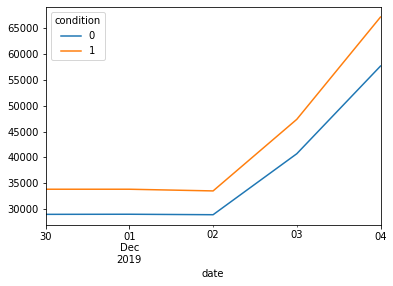

In [24]:
df.groupby(['date', 'condition'])['user_id'].count().unstack().plot()
# unable to capture weekly pattern (5 days)

In [25]:
# compare the test group conversion rate vs. control group conversion rate during the past five days
df.groupby('date')['conversion'].agg(ratio = lambda a: a[df.condition == 1].mean()/a[df.condition == 0].mean())
# agrees with the preliminary result that test is roughly 10% less than control

,ratio
date,
2019-11-30,0.858002
2019-12-01,0.894586
2019-12-02,0.911110
2019-12-03,0.891067
2019-12-04,0.923195


- treatment group is consistently worse than control gorup over the 5 days.  
- the experiment hasn't ran for 1-2 weeks to capture weekly pattern b/c 12-03/04 have more taffic than first 3 days, prob due to weekly pattern. There is more limitation about this data.  

### 4-2 by device

In [88]:
#device_count = df.groupby('device')['condition'].agg(count_treatment = lambda a:len(a[a == 1]), count_control = lambda a: len(a[a == 0]))
device_count = df.groupby('device')['condition'].agg(conut_treatment = lambda a: a[df.condition ==1].count(),
                                                    count_control = lambda a: a[a ==0].count())
device_count

,conut_treatment,count_control
device,,
GooglePixel,22141,19097
Huawei,29212,25374
Oppo,19353,16623
Sumsung,74090,63227
Xiaomi,2883,2494
iPad,19299,17078
iPhone,48742,41360


In [84]:
device_count*100.0/device_count.sum()

,conut_treatment,count_control
device,,
GooglePixel,10.263768,10.308605
Huawei,13.541628,13.696944
Oppo,8.971352,8.973134
Sumsung,34.345448,34.130082
Xiaomi,1.336455,1.346267
iPad,8.946319,9.218744
iPhone,22.595031,22.326224


- treatment and control are well balanced (/comparable) across device type, no bias in device.

In [63]:
# take a look at conversion rate
df.groupby('device')['conversion'].agg(conversion_treatment = lambda a: a[df.condition == 1].mean(),
                                       conversion_control = lambda a: a[df.condition == 0].mean())

,conversion_treatment,conversion_control
device,,
GooglePixel,0.045843,0.047809
Huawei,0.043030,0.047174
Oppo,0.041596,0.050111
Sumsung,0.043461,0.049093
Xiaomi,0.049948,0.050922
iPad,0.040779,0.046493
iPhone,0.043843,0.047824


## Use machine learning to automate the experiment data quality check 

- supervised learning: 
- label - condition (being in treatment or control): is there a factor that better explains whether a subject is assinged to treatment or control group, i.e., bias; 
  or label - conversion or not, is there a factor that have more influence on conversion compared to others. (not explored in this project)
- feature - other factors (excluding conversion, the target metric of the experiment)

is there a factor, compared to others, that stands out in determining the assignment of subject into treatment/control? if not, good randomization in all dimensions.

b/c we have categorical and continuous variables, we will use decision tree for a quick check 

In [64]:
pd.get_dummies(df)
# to do: cast date as str, and get dummies; delete user_id, conversion; condition as label

,user_id,date,conversion,condition,age,interface_app,interface_browser,language_Chinese,language_English,language_Others,...,state_Massachusetts,state_Michigan,state_New Jersey,state_New York,state_North Carolina,state_Ohio,state_Tennessee,state_Texas,state_Virginia,state_Washington
0,435134,2019-11-30,0,0,18,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,310928,2019-12-04,0,0,28,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,836325,2019-11-30,0,0,24,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,298244,2019-12-04,0,0,34,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,614947,2019-12-04,0,1,18,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452725,330151,2019-12-01,0,1,21,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
452726,380950,2019-11-30,1,0,23,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
452727,853589,2019-12-03,0,1,50,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
452730,310774,2019-12-01,0,0,37,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df_dt = df.copy()
df_dt = df_dt.drop(['user_id', 'conversion','condition'], axis = 1)
df_dt['date'] = df_dt['date'].apply(str)
y = df['condition']
df_dt = pd.get_dummies(df_dt)

In [66]:
df_dt

,age,date_2019-11-30 00:00:00,date_2019-12-01 00:00:00,date_2019-12-02 00:00:00,date_2019-12-03 00:00:00,date_2019-12-04 00:00:00,interface_app,interface_browser,language_Chinese,language_English,...,state_Massachusetts,state_Michigan,state_New Jersey,state_New York,state_North Carolina,state_Ohio,state_Tennessee,state_Texas,state_Virginia,state_Washington
0,18,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,28,0,0,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
2,24,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,34,0,0,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
4,18,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452725,21,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
452726,23,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
452727,50,0,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
452730,37,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [67]:
dt = DecisionTreeClassifier(max_depth=5, class_weight='balanced')

In [68]:
dt.fit(df_dt, y)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [69]:
export_graphviz(dt, out_file='dt_plot.dot', feature_names=df_dt.columns, proportion= True)

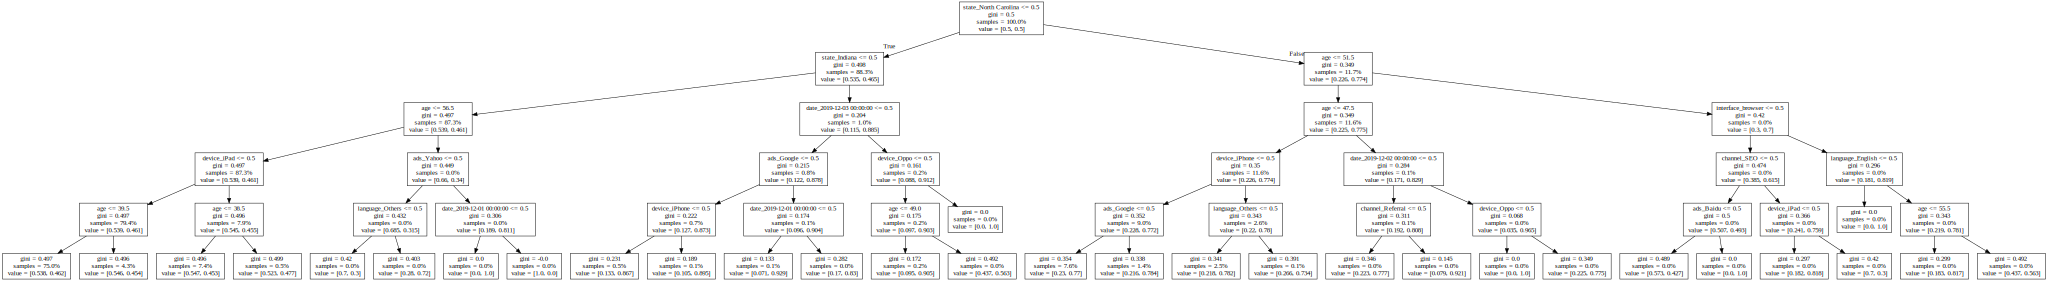

In [70]:
with open('dt_plot.dot') as d:
    graph = d.read()

graphviz.Source.from_file('dt_plot.dot')

In [71]:
df.loc[df.state == 'North Carolina']['conversion'].mean()

0.013997388866297113

In [72]:
df.loc[df.state == 'North Carolina']['condition'].mean()

0.7998630224942748

In [73]:
df.groupby('state')['condition'].agg('mean')

state
Airzona           0.490954
California        0.500296
Florida           0.498853
Georgia           0.501169
Illinois          0.494400
Indiana           0.899540
Massachusetts     0.497553
Michigan          0.498945
New Jersey        0.500862
New York          0.496162
North Carolina    0.799863
Ohio              0.503199
Tennessee         0.502404
Texas             0.491442
Virginia          0.496197
Washington        0.498775
Name: condition, dtype: float64

In [74]:
df.groupby('state')['conversion'].agg('mean')

state
Airzona           0.049259
California        0.050341
Florida           0.051325
Georgia           0.048660
Illinois          0.049075
Indiana           0.012830
Massachusetts     0.050771
Michigan          0.050242
New Jersey        0.049721
New York          0.049682
North Carolina    0.013997
Ohio              0.048863
Tennessee         0.048089
Texas             0.053431
Virginia          0.049606
Washington        0.053514
Name: conversion, dtype: float64

North Carolina and Indiana are the two states with extremely low conversion rate and higher likelihood to be assgined into the treatment group. North Carolina has 78% of the users in the test group and its average conversion rate is ~ 1%; Indiana has 89% of the users in the test group and its average conversion rate is ~1%.

follow-ups:
- investigate our experiment design and randomization logic, esp. allocation by state  
- remove PA, NC, IN from data and re conduct t-test  
- NC, IN: separate t-test  
- t-test by each state

In [75]:
df2 = df.loc[~ df.state.isin(['North Carolina','Indiana'])] # ~ means NOT
df3 = df.loc[ df.state.isin(['North Carolina','Indiana'])]

In [76]:
df3.head()

,user_id,date,interface,language,channel,ads,device,conversion,condition,sex,age,state
17,310570,2019-12-01,app,English,SEO,NaN,iPad,0,1,Male,31,North Carolina
25,216139,2019-12-01,app,English,Referral,NaN,Huawei,0,1,Male,25,North Carolina
26,312280,2019-12-03,app,Chinese,SEO,NaN,iPad,0,0,Male,39,North Carolina
29,504226,2019-12-04,app,English,Ads,Baidu,iPhone,0,1,Female,48,Indiana
41,812673,2019-12-03,browser,English,Referral,NaN,Sumsung,0,1,Male,33,North Carolina


In [77]:
#stats.ttest_ind(df2.loc[df2.condition ==1]['conversion'], df2.loc[df2.condition ==0]['conversion'], equal_var= False)
stats.ttest_ind(df2.loc[df2.condition ==1, 'conversion'], df2.loc[df2.condition ==0, 'conversion'], equal_var= False)
#statistically insig
#failure to reject null

Ttest_indResult(statistic=0.36340782173835057, pvalue=0.7163004791299912)

In [78]:
stats.ttest_ind(df3.loc[df3.condition ==1]['conversion'], df3.loc[df3.condition ==0]['conversion'], equal_var= False)
#statistically insig

Ttest_indResult(statistic=-0.956655241615398, pvalue=0.3387574569723738)

In [79]:
df.groupby('state')['conversion'].agg(conversion_rate_treatment = lambda a: a[df.condition == 1].mean(),
                                      conversion_rate_control =   lambda a: a[df.condition == 0].mean(),
                                      sample_count_treatment =    lambda a: a[df.condition == 1].count(),
                                      sample_count_control =      lambda a: a[df.condition == 0].count(),
                                      p_value = lambda a: stats.ttest_ind(a[df.condition == 1], a[df.condition == 0], equal_var=False).pvalue
                                     )

,conversion_rate_treatment,conversion_rate_control,sample_count_treatment,sample_count_control,p_value
state,,,,,
Airzona,0.047551,0.050906,4206,4361,0.473003
California,0.051183,0.049498,64260,64184,0.167446
Florida,0.050590,0.052056,26962,27086,0.439732
Georgia,0.047918,0.049405,5572,5546,0.715656
Illinois,0.048995,0.049154,7858,8036,0.962964
Indiana,0.012917,0.012048,3716,415,0.878326
Massachusetts,0.047947,0.053567,4067,4107,0.247087
Michigan,0.050557,0.049929,16793,16864,0.792034
New Jersey,0.051305,0.048132,9882,9848,0.305148


stats insig for all states.

## 6. Decision Making

After we control the experiment result by state, the new UI vs. the old is not statistically significantly different from each other, w.r.t. conversion rate.

There are a couple of follow-up investigation needed:
- The experiment is not well designed, without enough time window to collect weekly pattern;  
- There is sthg wrong with the randomization. We need to check the randomization code logic, and the data collection pipeline. Find the SDE/DE/DS in charge of this.  
- The current conclusion on NC and IN are still problematic, given its highly skewed data samples in test group. We can 

1) examine if the randomization is done right for the two states;   
2) if no, then we can try rebalancing the data with adjustments or propensity score matching, and re-do the t-test on balanced data for NC/IN.  


- We don't have treatment data for PA, and PA is the one of the key states i our customer base. We need to re-do the experiment in a correct way for PA.  
- Since the new and old UI don't makea any difference by state, we need to make business decision based on other consideration, i.e., cost of replacement, code base maintenance, long-term consideration such as acquisition, branding.

### a side note regarding the pros and cons of decision tree algorithm 
pros
- compared to other algorithms, it requires less effort for data preparation during pre-processing
- it does not require normalizatio of data
- it does not require scaling of data
- missing values in the data does not affect the process of building a DT to a considerable extent.
- its very intuitive and easy to explain to non-technical   

cons
- a small change in the data can cause a large change in the structure of the tree causing instability
- training of the model can be relatively expensive as the the complexcity and the time taken are more
- the algorithm is inadequent for applying regression and predicting continuous values